In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [38]:
from distgen import Generator

gen = Generator('distgen_laser.yaml')
gen['n_particle'] = 100
gen

<disgten.Generator with input: 
n_particle: 100
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: 2019_11_04_135614reg_out.txt
  type: file2d

>

In [8]:
gen.run()
gen.particles

<ParticleGroup with 100 particles at 0x7f8d26d62390>

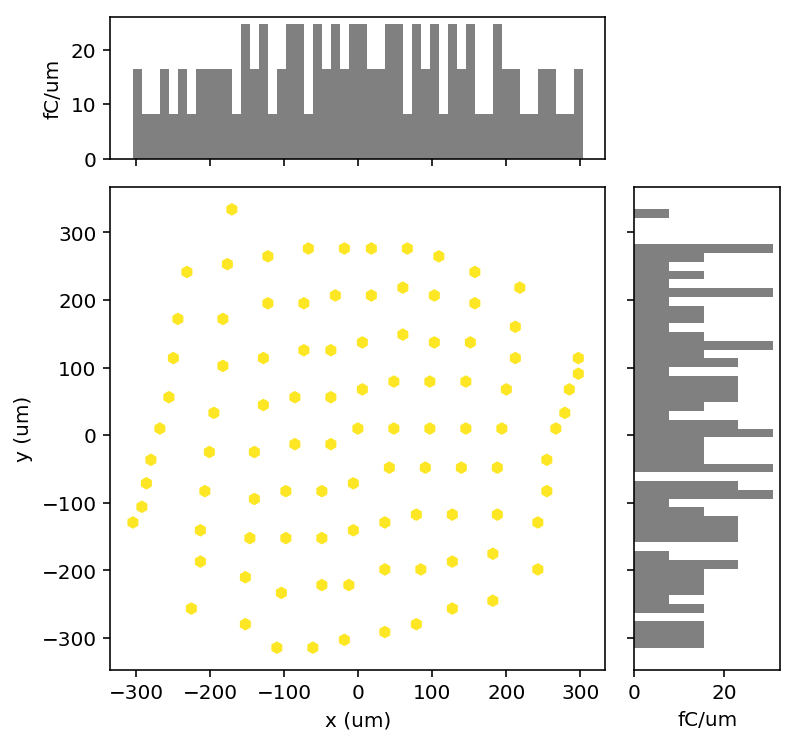

In [9]:
gen.particles.plot('x', 'y', bins=50)

In [11]:
from gpt import GPT

In [40]:
G = GPT('gpt.in', initial_particles=G.particles, workdir='temp', use_tempdir=False)
G.set_variables({'gun_peak_field':20e6,
                  'gun_phase':171.340,
                  'tmax': 4e-7, 
                  'RadiusMax':.015,
                  'Ntout':100,
                  'dtmin':0,
                  'GBacc':6.5,
                  'xacc':6.5,
                  'space_charge':0,
                  'BSOL':0.057,
                 });

In [41]:
G.run(gpt_verbose=True)
print(G)


GPT object:
   Original input file: gpt.in
   Template location: /Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/apex_gun
   Top leve work dir: /Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/apex_gun/temp

Run Control
   Run configured: True
   Work location: /Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/apex_gun/temp
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.5439989566802979 (sec)


In [47]:
#GG.input
from matplotlib import pyplot as plt

plt.plot(G.stat('mean_z','screen'), G.stat('sigma_x','screen')*1e6);
plt.plot(G.stat('mean_z','screen'), G.stat('sigma_y','screen')*1e6);
plt.xlabel('z (m)')
plt.ylabel('$\sigma_{x,y}$ ($\mu$m)')

Text(0,0.5,'$\\epsilon_{n,x}$ ($\\mu$m)')

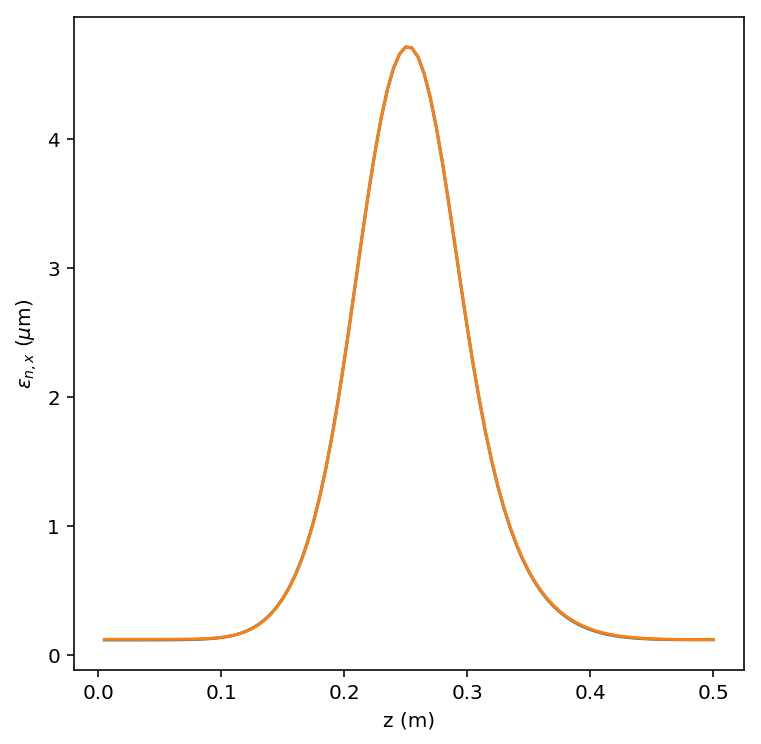

In [50]:
plt.plot(G.stat('mean_z','screen'), G.stat('norm_emit_x','screen')*1e6);
plt.plot(G.stat('mean_z','screen'), G.stat('norm_emit_y','screen')*1e6);
plt.xlabel('z (m)')
plt.ylabel('$\epsilon_{n,x}$ ($\mu$m)')

In [8]:
# Turn space charge off
I.total_charge = 0
I.stop = 0.5

In [9]:
I.run()

In [10]:
I.output.keys()

dict_keys(['run_info', 'stats', 'slice_info', 'particles'])

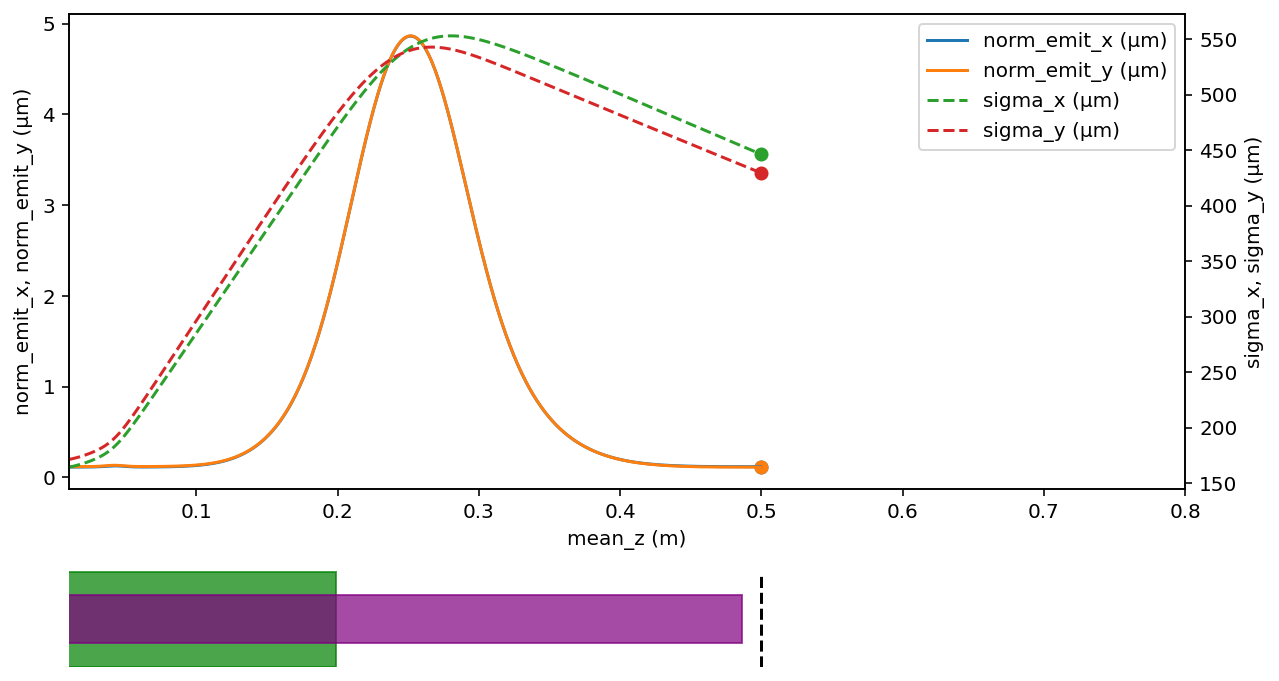

In [12]:
I.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(0.01, 0.8), figsize=(10,6))

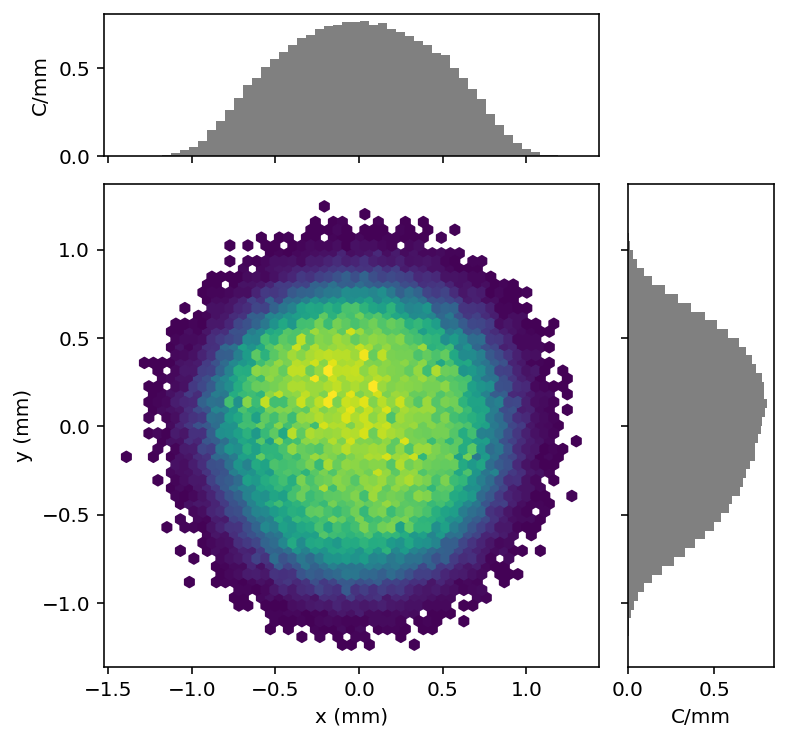

In [13]:
I.particles['final_particles'].plot('x', 'y', bins=50)

In [14]:
I.archive()

'impact_f718655836292d6ebb06860a0323b529.h5'

In [15]:
!rm *h5